<a href="https://colab.research.google.com/github/jhonda18/Python3/blob/main/Clase_4_20210508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de módulos (librerías)

* La clase pasada vimos un poco de Pandas
* Hoy continuamos con Pandas y detección y tratamiento de datos missing.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
schema = {"PatientID": "category",
          "Diabetic": "category"}

diabetes = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/diabetes.csv", dtype=schema)
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PatientID               15000 non-null  category
 1   Pregnancies             15000 non-null  int64   
 2   PlasmaGlucose           15000 non-null  int64   
 3   DiastolicBloodPressure  15000 non-null  int64   
 4   TricepsThickness        15000 non-null  int64   
 5   SerumInsulin            15000 non-null  int64   
 6   BMI                     15000 non-null  float64 
 7   DiabetesPedigree        15000 non-null  float64 
 8   Age                     15000 non-null  int64   
 9   Diabetic                15000 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 1.7 MB


## Trabajar con index
Como se ha mencionado, una parte importante de los DataFrames son los index, que por lo general es un valor númerico de 0 a n-1, donde n es el número de observaciones totales en el DataFrame.

Sin embargo, podemos mover una columna del cuerpo del DataFrame al índice, de la siguiente forma:

* set_index(column_name)

También puede tener varios índices, solo debemos pasar una lista sobre el método set_index(). Y para restablecer al DataFrame original,

* reset_index()

Adicional, el método reset_index() tiene un argumento drop que le permite eliminar el índice.


In [ ]:
diabetes.index

RangeIndex(start=0, stop=15000, step=1)

In [ ]:
diabetes = diabetes.set_index(keys='PatientID', inplace=False)
diabetes.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0
1883350,9,103,78,25,304,29.582192,1.282870,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
diabetes.index

CategoricalIndex(['1354778', '1147438', '1640031', '1883350', '1424119',
                  '1619297', '1660149', '1458769', '1201647', '1403912',
                  ...
                  '1220763', '1603490', '1202654', '1165919', '1453189',
                  '1490300', '1744410', '1742742', '1099353', '1386396'],
                 categories=['1000038', '1000069', '1000118', '1000183', '1000326', '1000340', '1000471', '1000482', ...], ordered=False, name='PatientID', dtype='category', length=15000)

In [ ]:
indices = diabetes.sample(n=10, random_state=42).index.tolist()
indices

['1763065',
 '1814475',
 '1473525',
 '1123081',
 '1479105',
 '1978830',
 '1689235',
 '1936277',
 '1924402',
 '1614596']

In [ ]:
diabetes.loc[indices, ["Age", "Diabetic"]]

,Age,Diabetic
PatientID,,
1763065,24,0
1814475,34,1
1473525,22,0
1123081,21,0
1479105,26,0
1978830,32,0
1689235,21,1
1936277,26,0
1924402,35,0


In [ ]:
diabetes.reset_index(drop=False, inplace=True)

diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


---

## Set de datos de temperatura

In [ ]:
temperatures = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/temperatures.csv",
                           index_col=0, parse_dates=["date"])

# temperatures["date"] = pd.to_datetime(temperatures["date"], format="%Y-%m-%d")

temperatures.head().append(temperatures.tail())

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
16495,2013-05-01,Xian,China,18.979
16496,2013-06-01,Xian,China,23.522
16497,2013-07-01,Xian,China,25.251
16498,2013-08-01,Xian,China,24.528
16499,2013-09-01,Xian,China,NaN


In [ ]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16500 non-null  datetime64[ns]
 1   city        16500 non-null  object        
 2   country     16500 non-null  object        
 3   avg_temp_c  16407 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 644.5+ KB


In [ ]:
# Extrayendo información a partir de la fecha (year, month, day)

temperatures["date"].dt.year

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
16495    2013
16496    2013
16497    2013
16498    2013
16499    2013
Name: date, Length: 16500, dtype: int64

In [ ]:
temperatures.describe(exclude="number")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,city,country
count,16500,16500,16500
unique,165,100,49
top,2002-11-01 00:00:00,Shanghai,China
freq,100,165,2640
first,2000-01-01 00:00:00,NaN,NaN
last,2013-09-01 00:00:00,NaN,NaN


In [ ]:
print(f"La fecha minima es: {temperatures['date'].min()}, y la fecha máxima es: {temperatures['date'].max()}")

La fecha minima es: 2000-01-01 00:00:00, y la fecha máxima es: 2013-09-01 00:00:00


In [ ]:
temperatures.set_index(keys="date", inplace=True)

temperatures.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date', length=16500, freq=None)

In [ ]:
temperatures.loc[:, "avg_temp_c"]

date
2000-01-01    27.293
2000-02-01    27.685
2000-03-01    29.061
2000-04-01    28.162
2000-05-01    27.547
               ...  
2013-05-01    18.979
2013-06-01    23.522
2013-07-01    25.251
2013-08-01    24.528
2013-09-01       NaN
Name: avg_temp_c, Length: 16500, dtype: float64

In [ ]:
temperatures.loc['2010-06': '2011-01', :]

,city,country,avg_temp_c
date,,,
2010-06-01,Abidjan,Côte D'Ivoire,26.683
2010-07-01,Abidjan,Côte D'Ivoire,25.589
2010-08-01,Abidjan,Côte D'Ivoire,25.400
2010-09-01,Abidjan,Côte D'Ivoire,25.710
2010-10-01,Abidjan,Côte D'Ivoire,26.397
...,...,...,...
2010-09-01,Xian,China,19.630
2010-10-01,Xian,China,12.292
2010-11-01,Xian,China,6.742


## Tablas dínamicas
Otra forma de calcular estadísticas agrupadas son las tablas dínamicas. Algunos argumentos interesantes son:

* **values** es la columna que desea resumir.
* **index** es la columna por la que desea agrupar.
* **aggfunc** como se quiere agregar (por ejemplo, mediana)
Nota:

De forma predeterminada el método **.pivot_table()** toma el valor medio para cada grupo.
Para agrupar por dos variables, podemos pasar un segundo nombre de variable al argumento columns.
En caso de tener valores missing, podemos completarlos (imputarlos) usando el argumento *fill_value*.


In [ ]:
pd.set_option("float_format", '{:,.2f}'.format)

In [ ]:
diabetes.pivot_table(values="SerumInsulin", index="Diabetic",
                     columns="Pregnancies", aggfunc='mean', fill_value=0).style.background_gradient(cmap="Blues")

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Diabetic,,,,,,,,,,,,,,,
0,113.272895,117.768033,116.854545,111.282776,105.176471,129.470588,110.373887,114.886331,105.963801,112.863309,125.664179,113.000000,0.000000,0.000000,0.000000
1,190.528302,179.704348,187.020672,181.500000,189.235593,180.436877,179.333333,170.000000,179.507075,197.077586,166.807692,217.820000,203.508772,178.855072,215.965517


## Unir datos (merge)
En muchas ocasiones tendremos diferentes archivos planos, y para analizar lo que me interesa debo unir los diferentes archivos.


In [ ]:
schema = {"PatientID": "category"}

doctors = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/doctors.csv",
                      encoding='latin-1', dtype=schema)

doctors = doctors.rename(columns={"PatientID": "patientid"})

doctors.head()

,patientid,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


In [ ]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PatientID  14895 non-null  category
 1   Physician  14895 non-null  object  
dtypes: category(1), object(1)
memory usage: 262.0+ KB


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14790 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PatientID               14790 non-null  category
 1   Pregnancies             14790 non-null  int64   
 2   PlasmaGlucose           14790 non-null  int64   
 3   DiastolicBloodPressure  14790 non-null  int64   
 4   TricepsThickness        14790 non-null  int64   
 5   SerumInsulin            14790 non-null  int64   
 6   BMI                     14790 non-null  float64 
 7   DiabetesPedigree        14790 non-null  float64 
 8   Age                     14790 non-null  int64   
 9   Diabetic                14790 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 1.8 MB


In [ ]:
diabetes.describe(exclude="number")

,PatientID,Diabetic
count,15000,15000
unique,14895,2
top,1127499,0
freq,2,10000


In [ ]:
# Eliminar datos duplicados de diabetes

diabetes.drop_duplicates(subset=["PatientID"], keep=False, inplace=True)

In [ ]:
data = pd.merge(left=diabetes.loc[:, ["PatientID", "Age", "SerumInsulin"]], right=doctors,
                how='left', left_on=['PatientID'], right_on=["patientid"])

In [ ]:
data.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
Physician                 0
dtype: int64

In [ ]:
data.sample(n=10)

,PatientID,Age,SerumInsulin,patientid,Physician
12367,1755716,25,15,1755716,Nazzareno Piccio
8253,1974512,23,153,1974512,Rodrigo Romani
8947,1325747,23,171,1325747,Carey Merrill
9546,1551981,25,29,1551981,Amalio Pizarro
13658,1248129,21,85,1248129,Fabio Jaramillo
1558,1324939,46,75,1324939,Nicholas Rose
11962,1833086,21,37,1833086,Francine Fischer
12092,1278319,32,77,1278319,Maya Steele
8237,1153295,22,16,1153295,Elwood McGee
854,1922672,21,41,1922672,Viv Pichardo


## Detección y tratamiento de datos missing

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/pima-indians-diabetes%20data.csv",
                       dtype={"Class": "category"})
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.00,148.00,72.00,35.00,nan,33.60,0.63,50,1.0
1,1.00,85.00,66.00,29.00,nan,26.60,0.35,31,0.0
2,8.00,183.00,64.00,nan,nan,23.30,0.67,32,1.0
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21,0.0
4,0.00,137.00,40.00,35.00,168.00,43.10,2.29,33,1.0


## Pasos para tratar valores missing
Convierta todos los valores missing en valores nulos. 
* En algunos casos, los valoress missing puede aparecer con valores como 999, -1, '?', entre otros.
* Analice la cantidad y el tipo de datos que faltan.
* Eliminar o imputar adecuadamente los datos missing.
* Evaluar y comparar el rendimiento del conjunto de datos tratado/imputado.


## Detectemos los valores missing
En los casos donde encontramos valoress missing codificados con algún valor, podemos usar el argumento na_values del método .read_csv() si estamos tratando con un archivo csv.


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Pregnant           768 non-null    float64 
 1   Glucose            763 non-null    float64 
 2   Diastolic_BP       733 non-null    float64 
 3   Skin_Fold          541 non-null    float64 
 4   Serum_Insulin      394 non-null    float64 
 5   BMI                757 non-null    float64 
 6   Diabetes_Pedigree  768 non-null    float64 
 7   Age                768 non-null    int64   
 8   Class              768 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 49.0 KB


In [ ]:
diabetes.isna().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [ ]:
diabetes.isna().mean() * 100

Pregnant             0.00
Glucose              0.65
Diastolic_BP         4.56
Skin_Fold           29.56
Serum_Insulin       48.70
BMI                  1.43
Diabetes_Pedigree    0.00
Age                  0.00
Class                0.00
dtype: float64

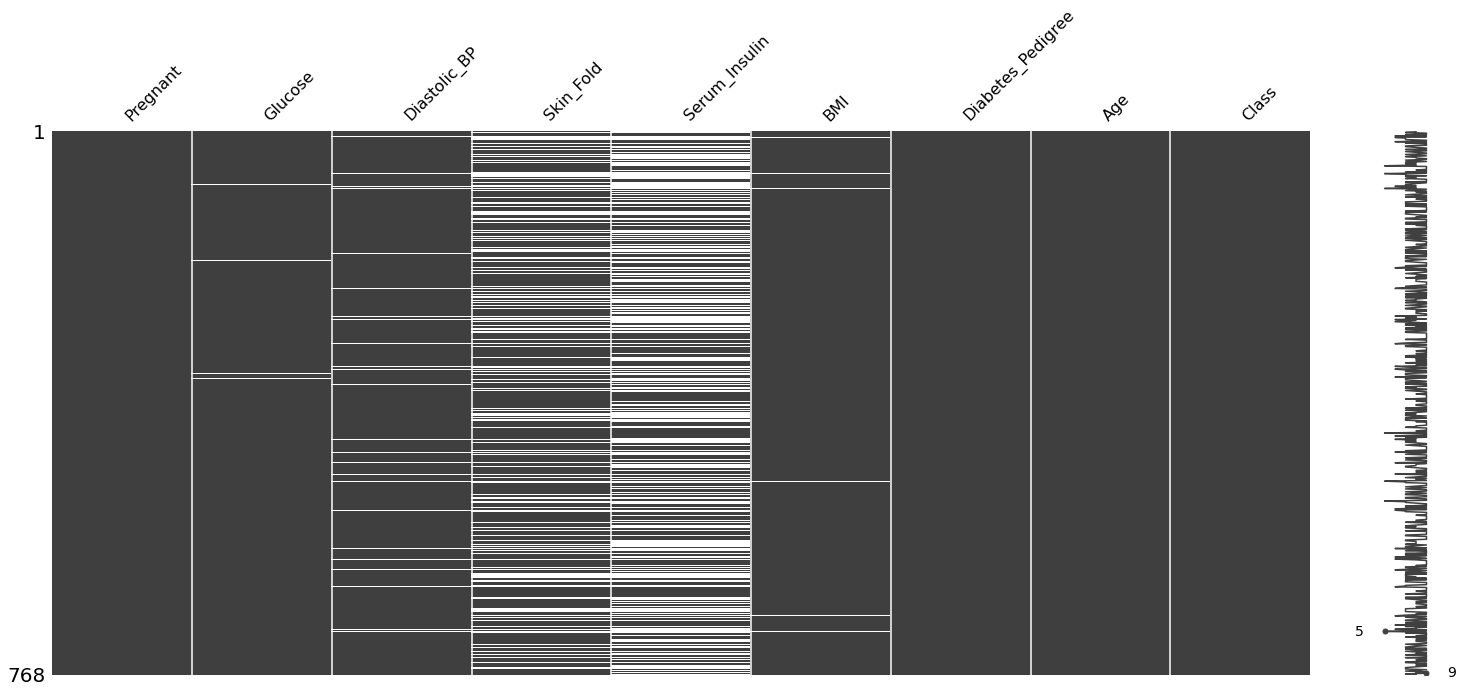

In [ ]:
msno.matrix(df=diabetes)

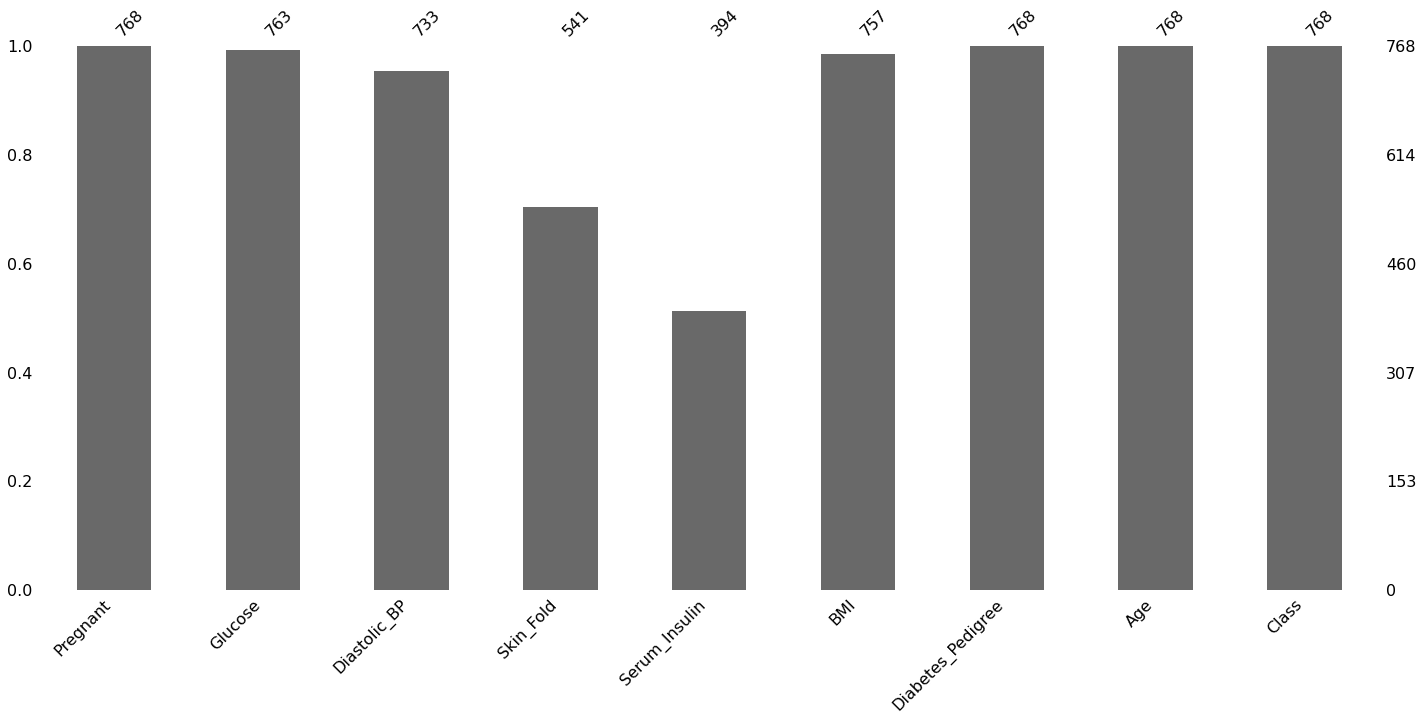

In [ ]:
msno.bar(df=diabetes)

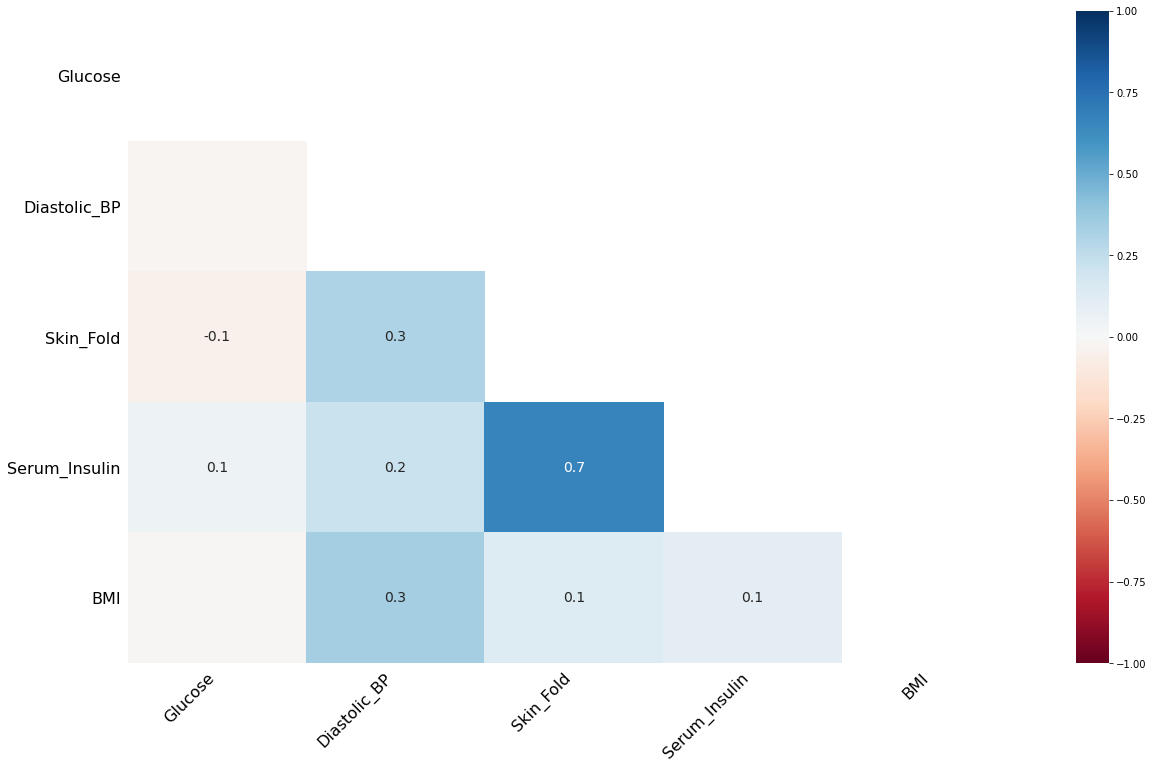

In [ ]:
msno.heatmap(df=diabetes)

## ¿Cuándo y como eliminar los datos missing?

Se recomienda eliminar las columnas con más del 20% de valores missing

In [ ]:
cols_to_drop = ["Skin_Fold", "Serum_Insulin"]

diabetes.drop(labels=cols_to_drop, axis=1, inplace=True)

In [ ]:
cols_to_drop = diabetes.columns[[True if i > 0.2 else False for i in diabetes.isna().mean().values.tolist()]]

diabetes = diabetes.drop(labels=cols_to_drop, axis=1)


## Manejo de datos faltantes
Pandas tiene una método **.fillna()** que nos puede ayudar con la imptación de los valores missing.


In [ ]:
diabetes.isna().sum()

Pregnant              0
Glucose               5
Diastolic_BP         35
BMI                  11
Diabetes_Pedigree     0
Age                   0
Class                 0
dtype: int64

In [ ]:
median_glucose = diabetes["Glucose"].median()

diabetes["Glucose"] = diabetes["Glucose"].fillna(median_glucose)

In [ ]:
diabetes.isna().sum()

Pregnant              0
Glucose               0
Diastolic_BP         35
BMI                  11
Diabetes_Pedigree     0
Age                   0
Class                 0
dtype: int64